   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

C:\Users\Roma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Roma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Roma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Roma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

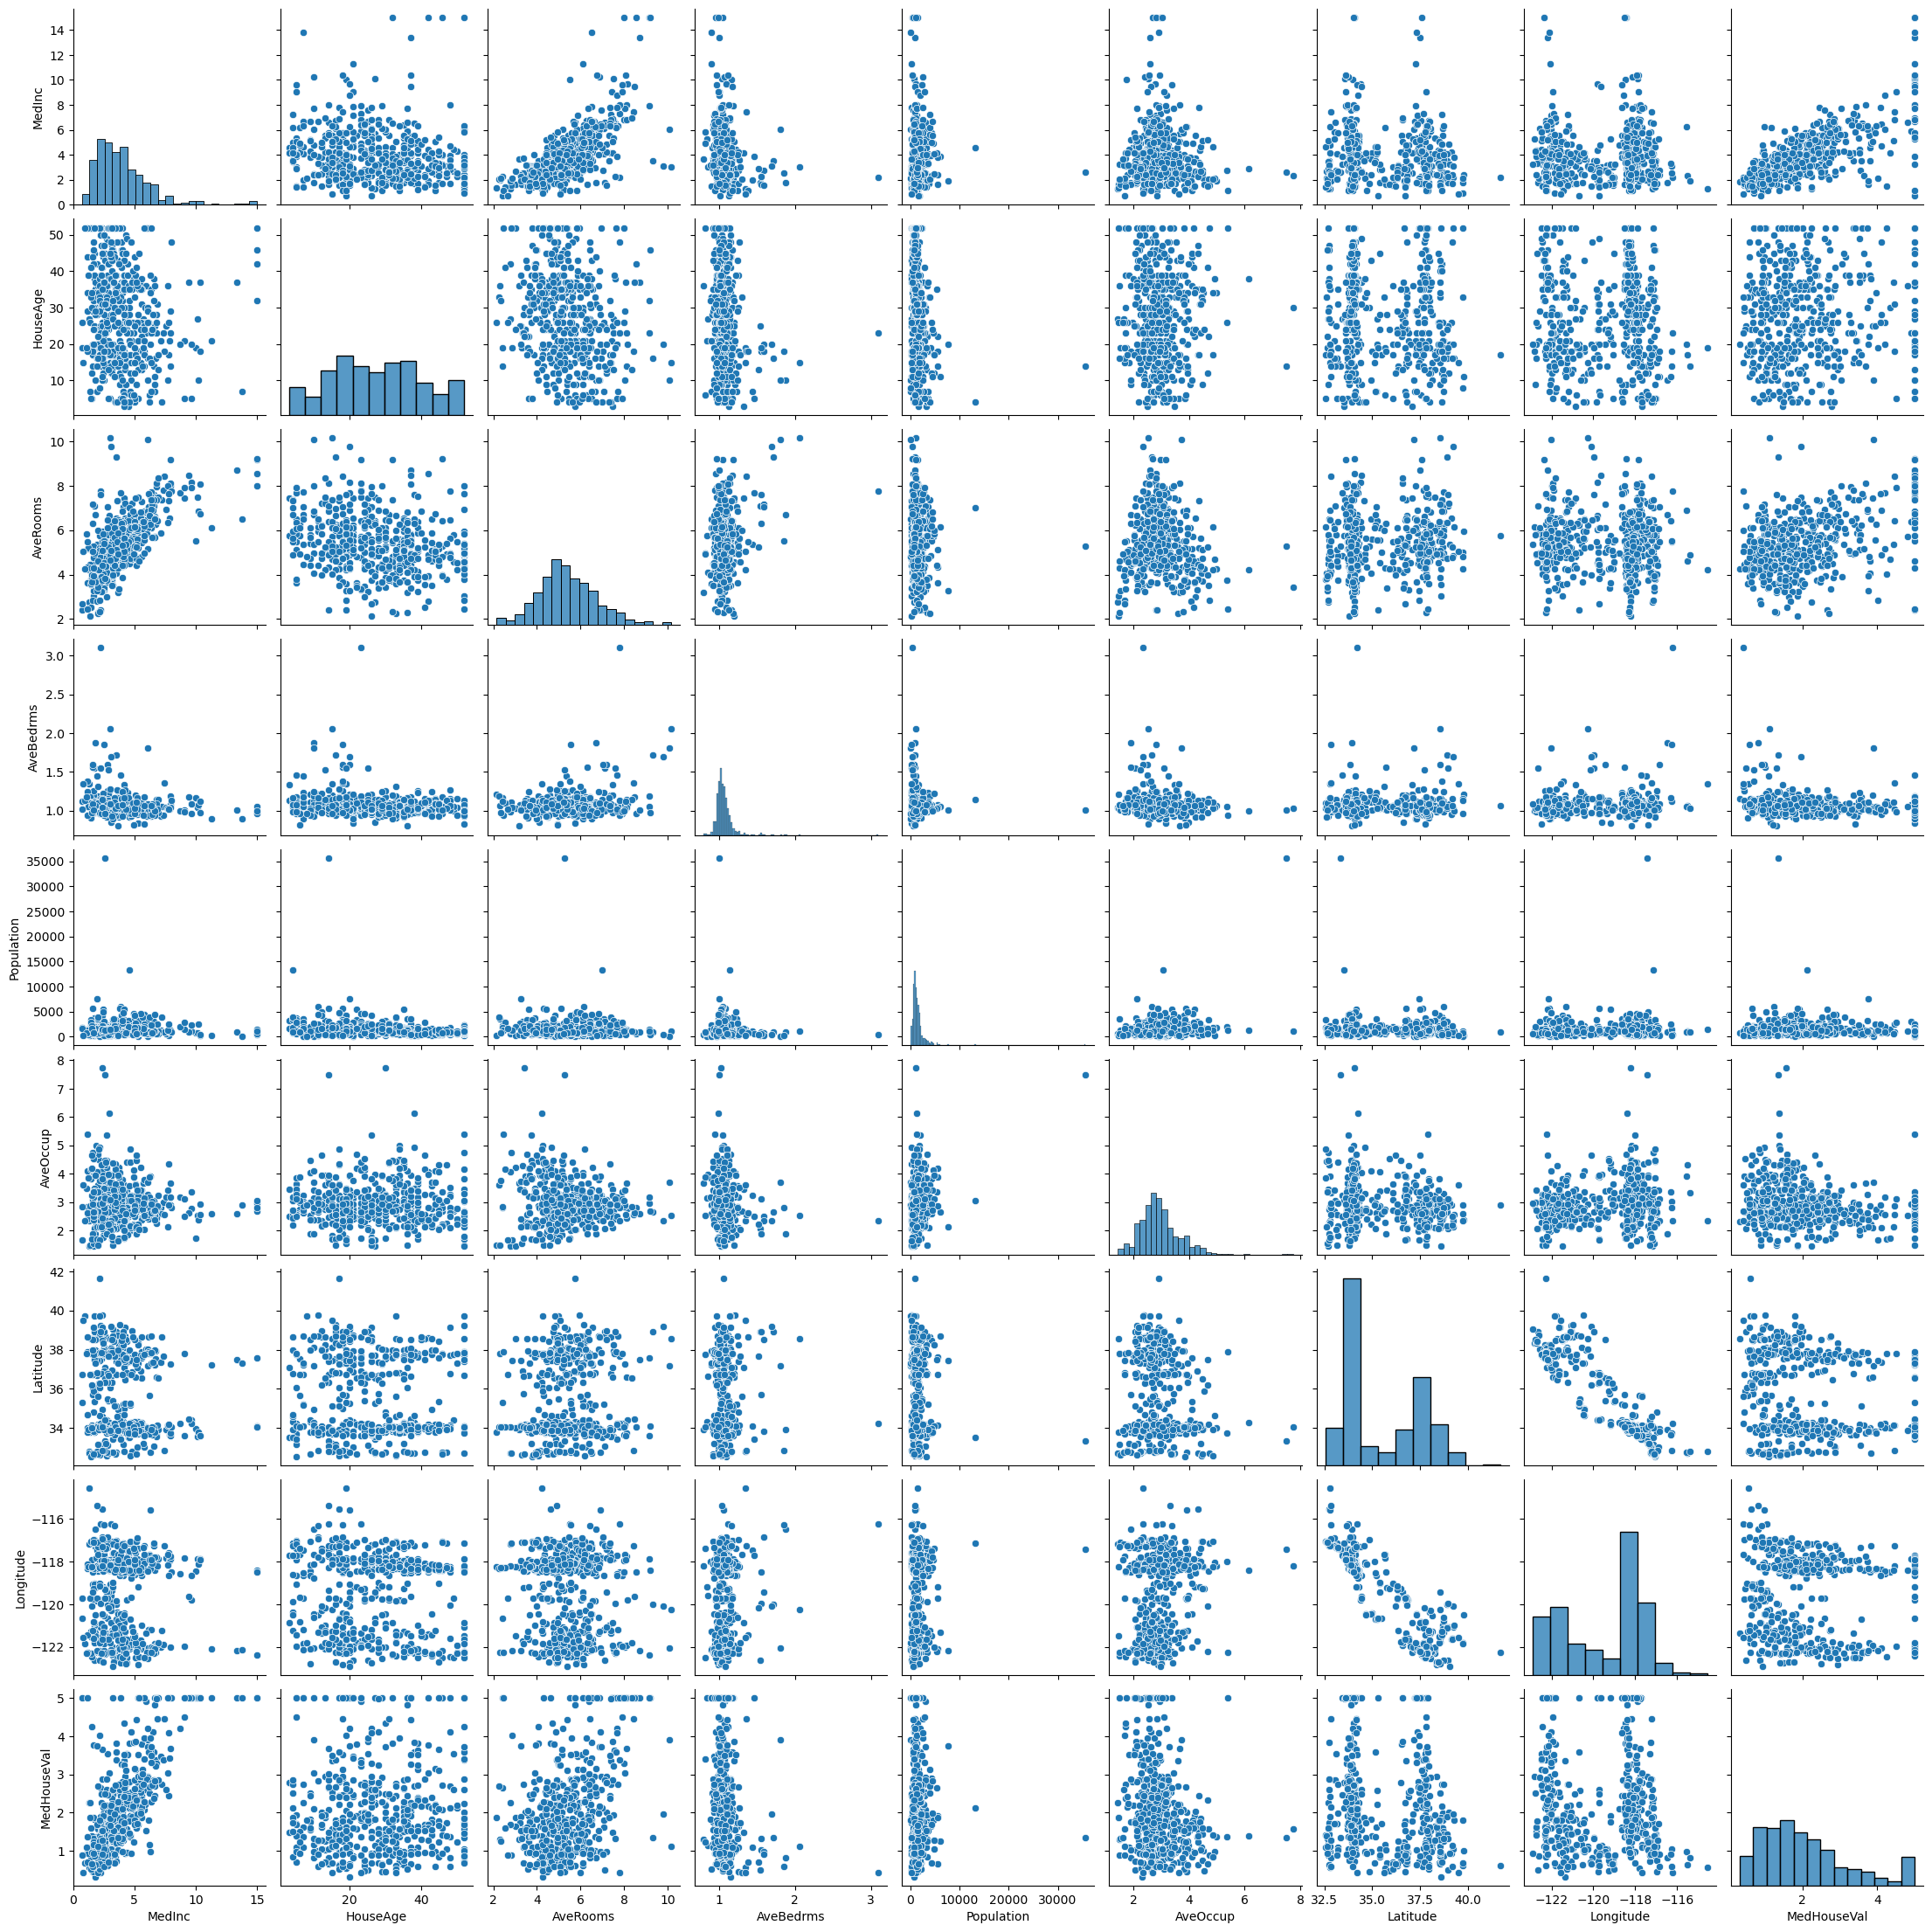

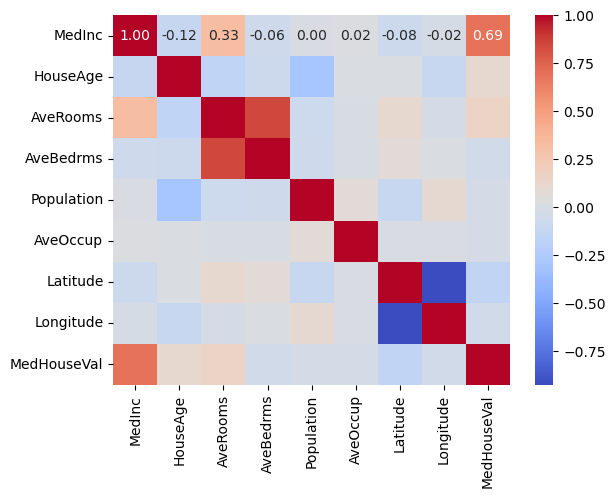

C:\Users\Roma\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.67635e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Roma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.514e+03, tolerance: 1.936e+00
  model = cd_fast.enet_coordinate_descent(


Лінійна регресія RMSE: 0.7284008391515451
Рідж регресія RMSE: 0.6548280602133835
Лассо регресія RMSE: 0.6877356529923414


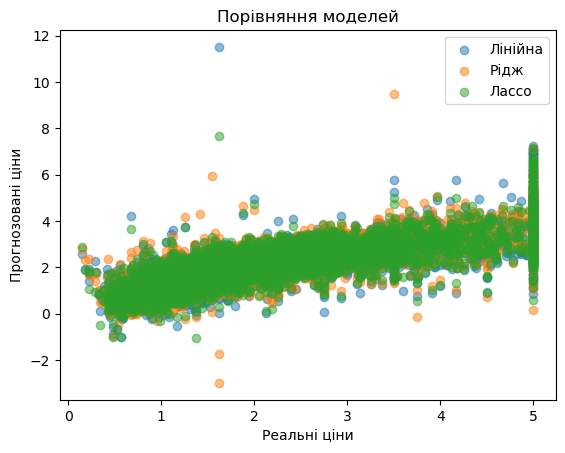

Найкраща модель: Рідж


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Завантаження даних
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target

# Перший аналіз даних
print(data.head())
print(data.describe())

# Візуалізація залежностей
sns.pairplot(data.sample(500))  # використовуємо зразок для швидкості
plt.show()

# Виявлення аномалій та неповних зразків
data.isna().sum()

# Кореляційний аналіз
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Розділення даних на навчальну та тестову частину
train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)
X_train = train_set.drop('MedHouseVal', axis=1)
y_train = train_set['MedHouseVal']
X_test = test_set.drop('MedHouseVal', axis=1)
y_test = test_set['MedHouseVal']

# Побудова регресійних моделей
# Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Поліноміальна регресія та Рідж регуляризація
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train_poly, y_train)
y_pred_ridge = ridge_reg.predict(X_test_poly)

# Лассо регуляризація
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_poly, y_train)
y_pred_lasso = lasso_reg.predict(X_test_poly)

# Оцінка помилок і аналіз
print("Лінійна регресія RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("Рідж регресія RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Лассо регресія RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

# Візуалізація результатів
plt.scatter(y_test, y_pred_lin, alpha=0.5, label='Лінійна')
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Рідж')
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label='Лассо')
plt.legend()
plt.xlabel('Реальні ціни')
plt.ylabel('Прогнозовані ціни')
plt.title('Порівняння моделей')
plt.show()

# Вибір найкращої моделі
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
best_model = 'Лінійна' if rmse_lin < rmse_ridge and rmse_lin < rmse_lasso else 'Рідж' if rmse_ridge < rmse_lasso else 'Лассо'
print(f"Найкраща модель: {best_model}")